In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [14]:
filename = "StudentsPerformance.csv"
score_df = pd.read_csv(filename)
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
score_df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parentEducation"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"TestPrep"},inplace=True)
score_df.head()


,gender,ethnicity,parentEducation,lunch,TestPrep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


C:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NEW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


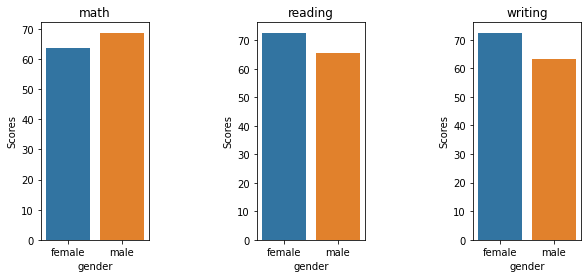

In [20]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=1, wspace=1, left = 0.25, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("Scores")
    plt.title(list(score_df.columns[-3:])[idx])
    
plt.show()

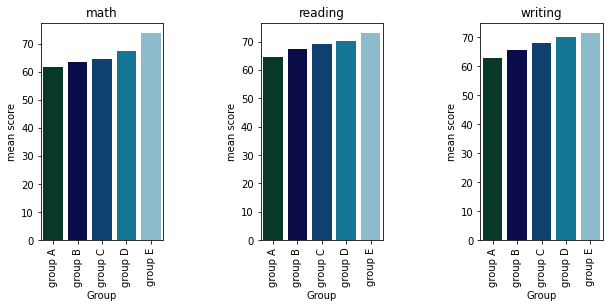

In [23]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = score_df.groupby("ethnicity")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "ocean")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(score_df.columns[-3:])[idx])
plt.show()
#Group E has the best performance in all the fields and group A has the worst performance

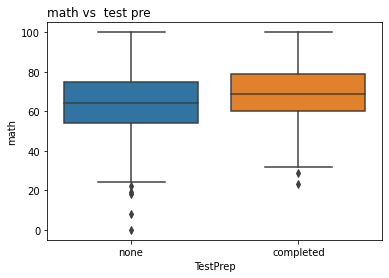

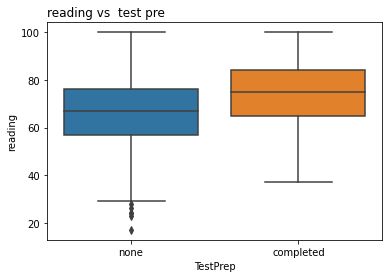

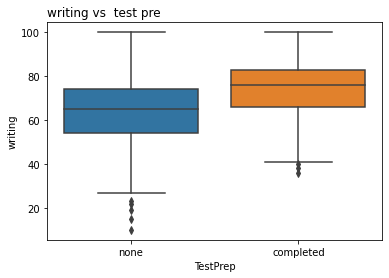

In [24]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["TestPrep"], y=score_df[item])
    plt.title(item+" vs  test pre", loc="left")
    plt.show()

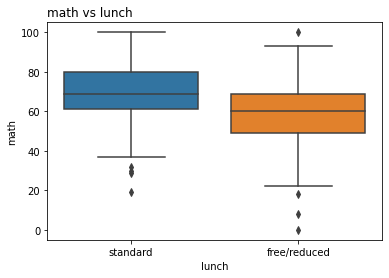

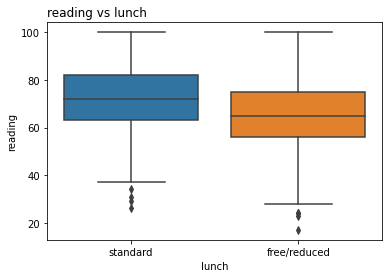

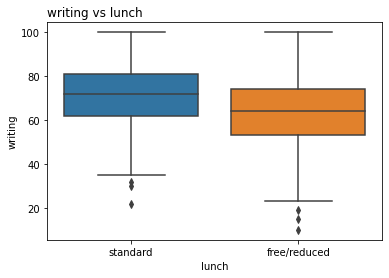

In [25]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["lunch"], y=score_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

In [27]:
labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df["parentEducation"] = labelencoder.fit_transform(train_df["parentEducation"])
train_df["TestPrep"] = labelencoder.fit_transform(train_df["TestPrep"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df

,gender,ethnicity,parentEducation,lunch,TestPrep,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,3,1,0,88,99,95
996,male,group C,2,0,1,62,55,55
997,female,group C,2,0,0,59,71,65
998,female,group D,4,1,0,68,78,77


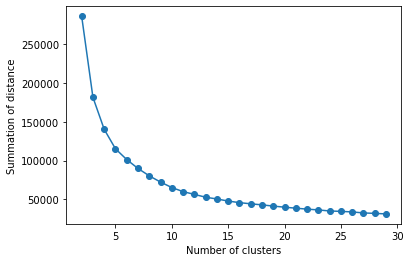

In [30]:
kmeans_dis = list()
for idx in range(2, 30):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,30)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

In [46]:
kmeans = KMeans(init = "k-means++", n_clusters = 10)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)

,gender,ethnicity,parentEducation,lunch,TestPrep,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,8
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,3
4,male,group C,some college,standard,none,76,78,75,1
5,female,group B,associate's degree,standard,none,71,83,78,7
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,none,40,43,39,5
8,male,group D,high school,free/reduced,completed,64,64,67,6
9,female,group B,high school,free/reduced,none,38,60,50,3


In [49]:
class_df = score_df.groupby("classification")[score_df.columns[-4:-1]].mean()
class_df.head(10)

,math,reading,writing
classification,,,
0,62.677966,57.694915,56.059322
1,83.373737,78.787879,76.343434
2,93.481481,94.611111,94.203704
3,48.318966,56.879310,55.008621
4,72.706349,68.650794,66.976190
5,46.153846,45.192308,43.051282
6,58.687943,68.219858,68.290780
7,68.115646,78.027211,77.891156
8,80.495146,87.640777,87.679612


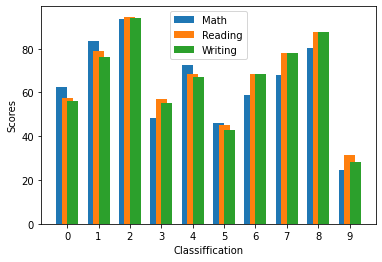

In [50]:
ind = np.arange(10)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [51]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([2, 8, 1, 7, 4, 6, 0, 3, 5, 9], dtype='int64', name='classification')

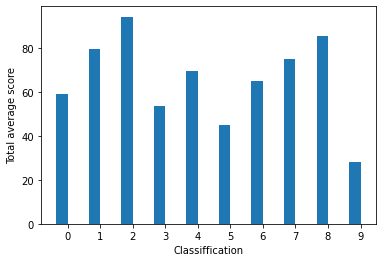

In [54]:
ind = np.arange(10)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.total_ave_score, width)
ax.set_xlabel('Classiffication')
ax.set_ylabel('Total average score')
ax.set_xticks(ind)
plt.show()

In [55]:
rank

classification
2    94.098765
8    85.271845
1    79.501684
7    74.678005
4    69.444444
6    65.066194
0    58.810734
3    53.402299
5    44.799145
9    28.055556
Name: total_ave_score, dtype: float64

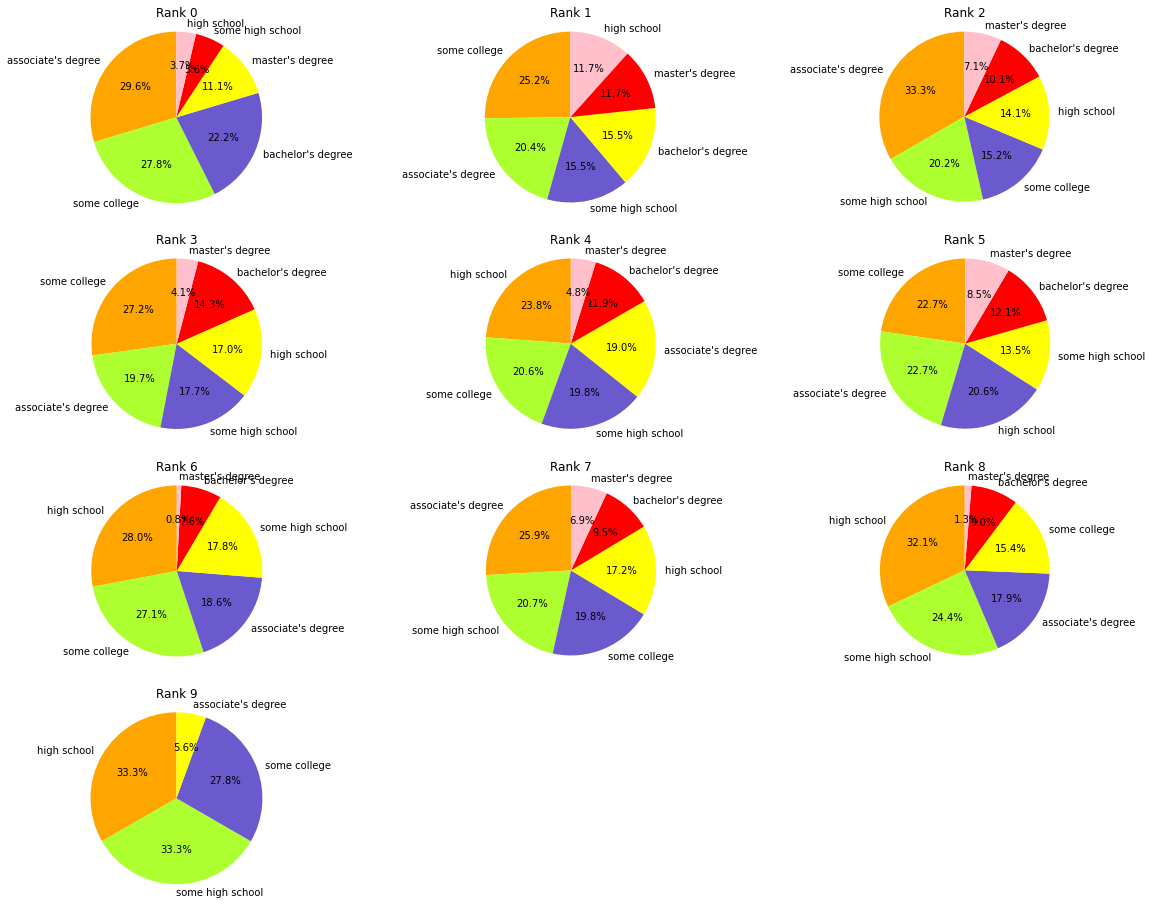

In [81]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","greenyellow","slateblue","yellow","red","pink","brown","gray"]
    for idx in range(10):
        plt.subplot(4,3, idx+1)
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parentEducation")

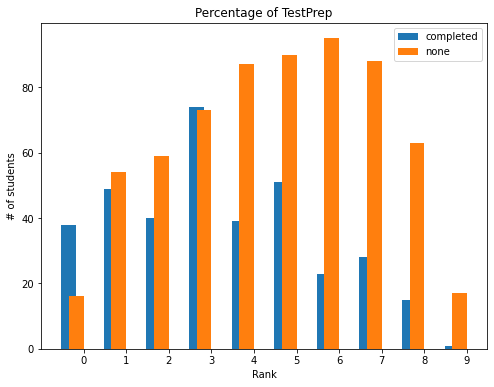

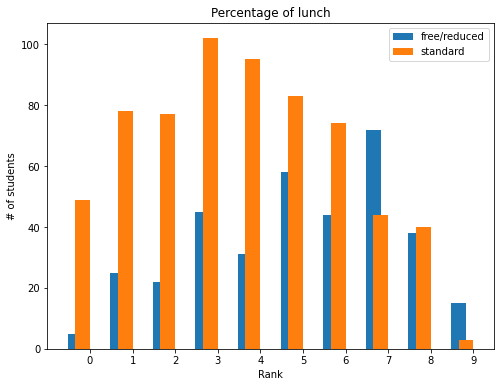

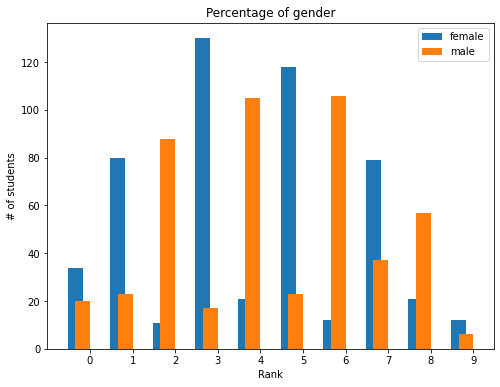

In [88]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(10)
    for idx in range(10):
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
    percentage_of_column = score_df[score_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("TestPrep") 
plot_bar_chart("lunch")
plot_bar_chart("gender")